# 1. Import required libraries and read the dataset. 


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [120]:
df=pd.read_csv('appsdata.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [121]:
df.shape

(10841, 13)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [123]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [124]:
df.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [125]:
set(df['Type'])

{'0', 'Free', 'Paid', nan}

In [126]:
set(df['Content Rating'])

{'Adults only 18+',
 'Everyone',
 'Everyone 10+',
 'Mature 17+',
 'Teen',
 'Unrated',
 nan}

# 4. Check if there are any duplicate records in the dataset? if any drop them.


In [127]:
duplicate_rows=df[df.duplicated()]
duplicate


0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 8893, dtype: bool

In [128]:
if not duplicate_rows.empty:
      df=df.drop_duplicates()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them. 


In [129]:
unique=df['Category'].unique()
unique

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [130]:
ic=['Invaild Catergory1','Invaild Catergory2']
df = df[~df['Category'].isin(ic)]
df.shape

(10358, 13)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low) 


In [131]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10358, dtype: float64

In [132]:
missing_value=df['Rating'].isnull().sum()
missing_value

1465

In [133]:
df["Rating"].isnull().sum()

1465

In [134]:
df["Rating_Category"]=df["Rating"].apply(lambda x:'high' if x>3.5 else 'low')

In [135]:
set(df["Rating_Category"])

{'high', 'low'}

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution. 


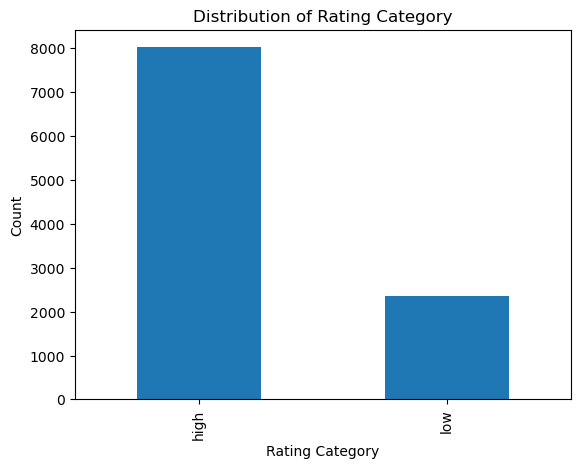

In [136]:
rating_count = df['Rating_Category'].value_counts()
rating_count

rating_count.plot(kind='bar')
plt.title('Distribution of Rating Category')

plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()

In [137]:
distribution = df['Rating_Category'].value_counts()
distribution

high    8013
low     2345
Name: Rating_Category, dtype: int64

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation) 


In [138]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10358, dtype: float64

In [139]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Reviews'] < lower_bound) | (df['Reviews'] > upper_bound)]


outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up,high
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31M,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,high
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,high
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531.0,24M,"10,000,000+",Free,0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10740,PhotoFunia,PHOTOGRAPHY,4.3,316378.0,4.4M,"10,000,000+",Free,0,Everyone,Photography,"June 3, 2017",4.0.7.0,2.3 and up,high
10781,Modern Strike Online,GAME,4.3,834117.0,44M,"10,000,000+",Free,0,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,high
10784,Big Hunter,GAME,4.3,245455.0,84M,"10,000,000+",Free,0,Everyone 10+,Action,"May 31, 2018",2.8.6,4.0 and up,high
10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223.0,24M,"1,000,000+",Free,0,Everyone,Strategy,"July 18, 2018",1.4.2,4.1 and up,high


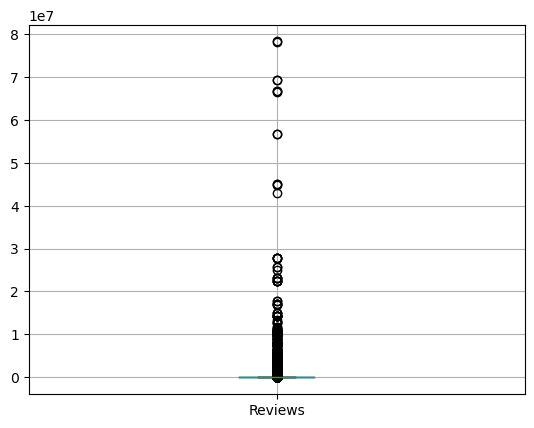

In [140]:
df.boxplot(column='Reviews')
plt.show()

In [141]:
df['Reviews'] = np.log1p(df['Reviews'])

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [142]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10358, dtype: object

In [143]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].str.replace('M', 'e6').str.replace('K', 'e3')

df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df = df.dropna(subset=['Size'])

In [144]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0.000000,9600000.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,low
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600000.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10838,Parkinson Exercices FR,MEDICAL,NaN,1.386294,9500000.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,low


# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type. 


In [145]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8516 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype 
--------------  ----- 
8516 non-null   object
dtypes: object(1)
memory usage: 133.1+ KB


In [146]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')

df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df

C:\Users\pavi reddy\AppData\Local\Temp\ipykernel_21520\4034092041.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0.000000,9600000.0,10,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,low
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600000.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10838,Parkinson Exercices FR,MEDICAL,NaN,1.386294,9500000.0,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,low


# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [147]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10835    0
10836    0
10837    0
10838    0
10840    0
Name: Price, Length: 8516, dtype: object

In [148]:
df["Price"]=df["Price"].str.replace('$','')
df['Price']=pd.to_numeric(df['Price'],errors='coerce')
df


C:\Users\pavi reddy\AppData\Local\Temp\ipykernel_21520\2500248642.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"]=df["Price"].str.replace('$','')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0.000000,9600000.0,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,low
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600000.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10838,Parkinson Exercices FR,MEDICAL,NaN,1.386294,9500000.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,low


# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis) 


In [149]:
columns_to_drop = [ 'App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
df = df.drop(columns_to_drop, axis=1)

In [150]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10835,BUSINESS,0.000000,9600000.0,10,Free,0.0,Everyone,low
10836,FAMILY,3.663562,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.609438,3600000.0,100,Free,0.0,Everyone,high
10838,MEDICAL,1.386294,9500000.0,1000,Free,0.0,Everyone,low


# 13. Encode the categorical columns. 


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         8516 non-null   object 
 1   Reviews          8516 non-null   float64
 2   Size             8516 non-null   float64
 3   Installs         8516 non-null   int64  
 4   Type             8516 non-null   object 
 5   Price            8516 non-null   float64
 6   Content Rating   8516 non-null   object 
 7   Rating_Category  8516 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 598.8+ KB


In [152]:
set(df['Category'])

{'ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FAMILY',
 'FINANCE',
 'FOOD_AND_DRINK',
 'GAME',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'MAPS_AND_NAVIGATION',
 'MEDICAL',
 'NEWS_AND_MAGAZINES',
 'PARENTING',
 'PERSONALIZATION',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SHOPPING',
 'SOCIAL',
 'SPORTS',
 'TOOLS',
 'TRAVEL_AND_LOCAL',
 'VIDEO_PLAYERS',
 'WEATHER'}

In [153]:
set(df['Content Rating'])

{'Adults only 18+',
 'Everyone',
 'Everyone 10+',
 'Mature 17+',
 'Teen',
 'Unrated'}

In [154]:
set(df['Type'])

{'Free', 'Paid'}

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Rating_Category'] = label_encoder.fit_transform(df['Rating_Category'])
df['Rating_Category']

0        0
1        0
2        0
3        0
4        0
        ..
10835    1
10836    0
10837    0
10838    1
10840    0
Name: Rating_Category, Length: 8516, dtype: int32

In [156]:
categorical_columns = ['Type', 'Content Rating']
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,Category,Reviews,Size,Installs,Price,Rating_Category,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0,5.075174,19000000.0,10000,0.0,0,1,0,0,1,0,0,0,0
1,0,6.875232,14000000.0,500000,0.0,0,1,0,0,1,0,0,0,0
2,0,11.379520,8700000.0,5000000,0.0,0,1,0,0,1,0,0,0,0
3,0,12.281389,25000000.0,50000000,0.0,0,1,0,0,0,0,0,1,0
4,0,6.875232,2800000.0,100000,0.0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4,0.000000,9600000.0,10,0.0,1,1,0,0,1,0,0,0,0
10836,11,3.663562,53000000.0,5000,0.0,0,1,0,0,1,0,0,0,0
10837,11,1.609438,3600000.0,100,0.0,0,1,0,0,1,0,0,0,0
10838,20,1.386294,9500000.0,1000,0.0,1,1,0,0,1,0,0,0,0


# 14. Segregate the target and independent features (Hint: Use Rating_category as the target) 


In [157]:
target=df['Rating_Category'] 
independent_column=df_encoded.drop('Rating_Category',axis=1)

# 15. Split the dataset into train and test. 


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_column, df_encoded['Rating_Category'], test_size=0.2, random_state=42)

# 16. Standardize the data, so that the values are within a particular range.


In [159]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized X_train:")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns))
print("\nStandardized X_test:")
print(pd.DataFrame(X_test_scaled, columns=X_test.columns))

Standardized X_train:
      Category   Reviews      Size  Installs     Price  Type_Free  Type_Paid  \
0    -0.421819  0.288556 -0.581247 -0.156948 -0.068811   0.284778  -0.284778   
1     1.764317 -0.543798  0.005795 -0.159082 -0.068811   0.284778  -0.284778   
2     1.035605  0.717521 -0.809789 -0.135612 -0.068811   0.284778  -0.284778   
3     1.035605  1.563697 -0.083830  0.077752 -0.068811   0.284778  -0.284778   
4     1.764317  0.037992 -0.487141 -0.158134 -0.068811   0.284778  -0.284778   
...        ...       ...       ...       ...       ...        ...        ...   
6807  1.521413  0.544457 -0.039017 -0.135612 -0.068811   0.284778  -0.284778   
6808  1.521413 -0.037204 -0.733609 -0.156948 -0.068811   0.284778  -0.284778   
6809  0.549797 -1.021903 -0.877008 -0.159295 -0.068811   0.284778  -0.284778   
6810 -0.178915  1.169656  2.515285 -0.040784 -0.068811   0.284778  -0.284778   
6811 -0.543271 -1.044587 -0.809789 -0.159295 -0.068811   0.284778  -0.284778   

      Content Rat